In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = 'Malgun Gothic'

In [1]:
import pandas as pd
df = pd.read_csv('steel_date.csv')

In [2]:
steel = df.copy()

In [3]:
steel.head()

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [4]:
# 필요없는 칼럼 삭제
steel_d = steel.drop([ 'FUR_HZ_TEMP', 'FUR_HZ_TIME' , 'FUR_SZ_TEMP','FUR_SZ_TIME',
                     'FUR_NO_ROW', 'FUR_TIME' , 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING'], axis = 1)
steel_d

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,HSB,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,적용,2조
1,1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,적용,2조
2,2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,적용,3조
3,3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,적용,3조
4,4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,적용,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,적용,2조
716,716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,적용,1조
717,717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,적용,4조
718,718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,적용,2조


In [5]:
steel_d.isnull().sum() # 결측치확인

Unnamed: 0      0
PLATE_NO        0
ROLLING_DATE    0
SCALE           0
SPEC            0
STEEL_KIND      0
PT_THK          0
PT_WDTH         0
PT_LTH          0
PT_WGT          0
FUR_NO          0
HSB             0
WORK_GR         0
dtype: int64

In [6]:
steel_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    720 non-null    int64  
 1   PLATE_NO      720 non-null    object 
 2   ROLLING_DATE  720 non-null    object 
 3   SCALE         720 non-null    object 
 4   SPEC          720 non-null    object 
 5   STEEL_KIND    720 non-null    object 
 6   PT_THK        720 non-null    float64
 7   PT_WDTH       720 non-null    int64  
 8   PT_LTH        720 non-null    int64  
 9   PT_WGT        720 non-null    int64  
 10  FUR_NO        720 non-null    object 
 11  HSB           720 non-null    object 
 12  WORK_GR       720 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 73.2+ KB


In [7]:
#steel_d['ROLLING_DATE'] = pd.to_datetime(steel_d['ROLLING_DATE']) 시간변경실패

In [12]:
dfw2 = steel_d.groupby(['WORK_GR', 'SCALE'], as_index = False).agg(count = ('PLATE_NO', 'count'))

dfw2
#카운트로 정렬했을때는 결과값이 똑같았음

,WORK_GR,SCALE,count
0,1조,불량,67
1,1조,양품,122
2,2조,불량,45
3,2조,양품,120
4,3조,불량,54
5,3조,양품,118
6,4조,불량,65
7,4조,양품,129


In [21]:
dfw3 = dfw2.pivot_table(index='WORK_GR', columns='SCALE', values='count').T
dfw3

WORK_GR,1조,2조,3조,4조
SCALE,,,,
불량,67,45,54,65
양품,122,120,118,129


- 4가지 정보를 한 차트안에 가능한지

In [22]:
dfw = steel.groupby(['WORK_GR','STEEL_KIND', 'SCALE'], as_index = False).agg(count = ('SPEC', 'count'))

dfw.head(1)

,WORK_GR,STEEL_KIND,SCALE,count
0,1조,C0,0,63


<AxesSubplot:xlabel='WORK_GR', ylabel='count'>

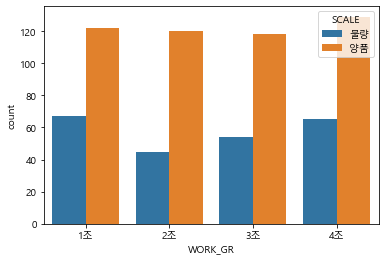

In [27]:
sns.barplot(data=dfw2, x='WORK_GR', y='count', hue='SCALE')

- 그룹 별 양품의 확률차이가 유의미하지 않다.
- 2조가 불량품의 확률이 가장 적은 것으로 추측할 수 있다.
- 다른 요소를 추가하여 분석할 필요가 있다.